In [62]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [63]:
df = pd.read_csv('C:/Users/My Lappie/Downloads/Datasets (2)/Logical Regression/netflix.csv')

In [64]:
df.head()

,Age,Subscription
0,62,1
1,18,0
2,40,0
3,51,1
4,37,1


In [65]:
import statsmodels.api as sm

In [66]:
y = df.Subscription
X = df.Age

In [67]:
logit_model = sm.Logit(y, X)

In [68]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.637599
         Iterations 4


In [69]:
# summary 1 is for linear regression 
# summary 2 is for logistic regression

result.summary2()  

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit            Pseudo R-squared: 0.053  
Dependent Variable: Subscription     AIC:              27.5040
Date:               2021-08-28 10:47 BIC:              28.4997
No. Observations:   20               Log-Likelihood:   -12.752
Df Model:           0                LL-Null:          -13.460
Df Residuals:       19               LLR p-value:      nan    
Converged:          1.0000           Scale:            1.0000 
No. Iterations:     4.0000                                    
----------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
----------------------------------------------------------------
Age       0.0159     0.0111   1.4386   0.1503   -0.0058   0.0376
==============================================================

"""

In [71]:
Insurance_data= pd.read_csv('C:/Users/My Lappie/Downloads/Datasets (2)/Logical Regression/carInsurance_train.csv')
Insurance_test= pd.read_csv('C:/Users/My Lappie/Downloads/Datasets (2)/Logical Regression/carInsurance_test.csv')

In [72]:
Insurance_data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [73]:
print('Shape of training data', Insurance_data.shape)
print('Shape of training test', Insurance_test.shape)

Shape of training data (4000, 19)
Shape of training test (1000, 19)


In [74]:
Insurance_data.isna().sum().sort_values(ascending = False)

Outcome             3042
Communication        902
Education            169
Job                   19
CarLoan                0
Age                    0
Marital                0
Default                0
Balance                0
HHInsurance            0
CarInsurance           0
CallEnd                0
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
CallStart              0
Id                     0
dtype: int64

In [75]:
Insurance_data.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [76]:
Insurance_data.describe(include = 'object')

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,15:48:27,10:52:24
freq,893,2304,1988,2831,1049,437,3,3


### Vizualization Analysis

In [77]:
Insurance_data.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [78]:
impt_feats = ['CarInsurance', 'Age', 'Balance', 'HHInsurance','CarLoan', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']

C:\Users\My Lappie\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


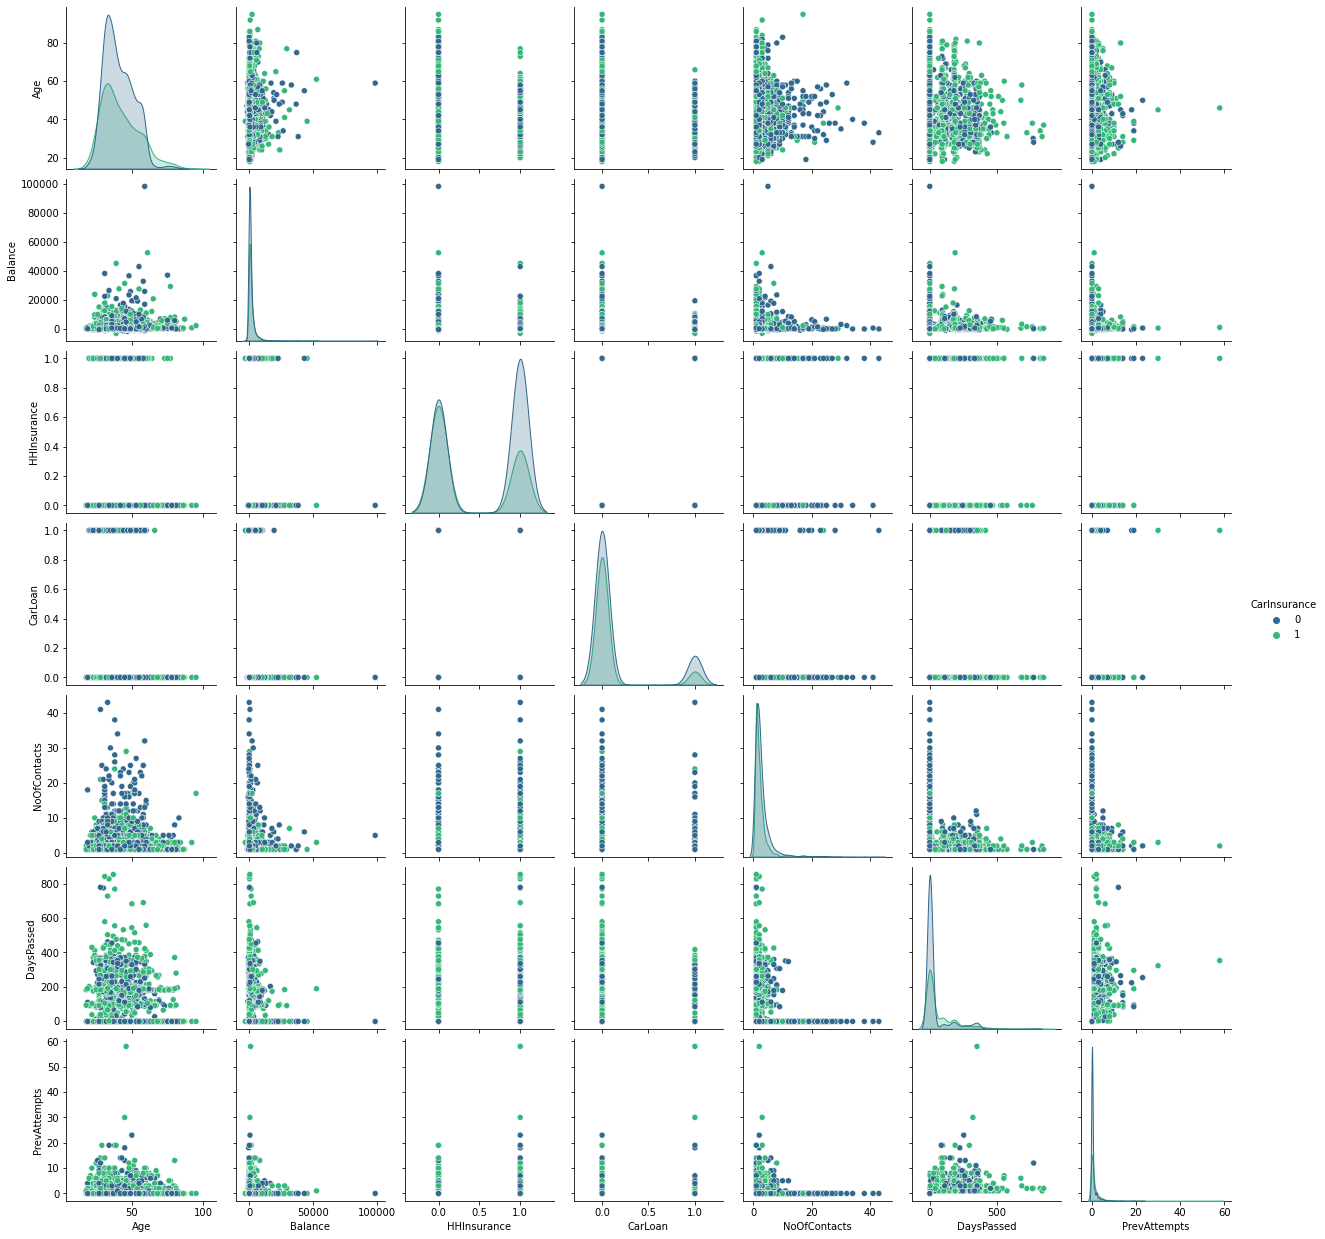

In [79]:
sns.pairplot(Insurance_data[impt_feats], hue = 'CarInsurance', palette= 'viridis', size=2.5)  

# hue 

C:\Users\My Lappie\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


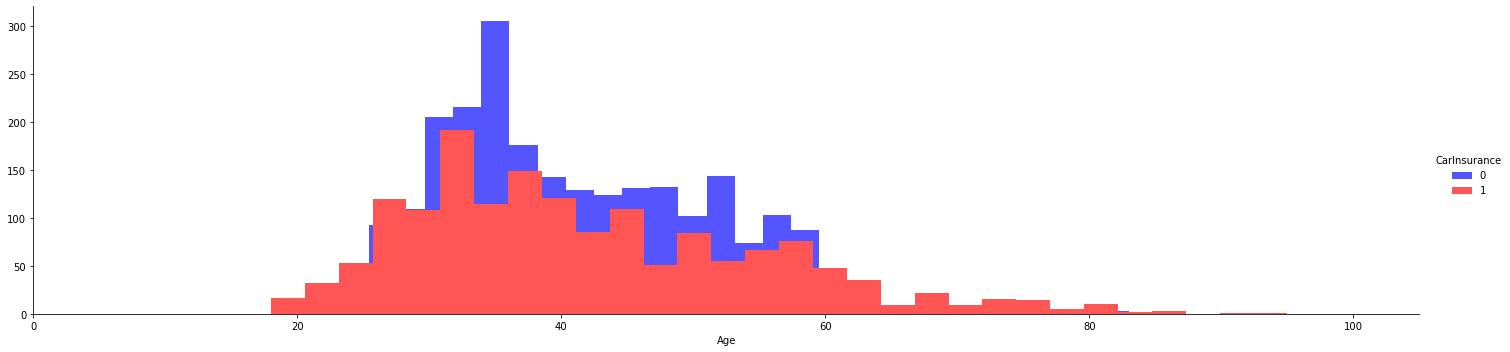

In [80]:
# facet two plot in one
# a further look at age

facet = sns.FacetGrid(Insurance_data, hue = "CarInsurance", size=5, aspect=4, palette='seismic')
facet.map(plt.hist, 'Age', bins=30)
facet.set(xlim=(0, Insurance_data.Age.max() + 10))
facet.add_legend()

above observation :\
people below 20 dont purchase insurance as much \
people above 60 buy insurance\
people between 20 to 40 purchase less insurance compare to people between age 40 to 60

In [81]:
Insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

C:\Users\My Lappie\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


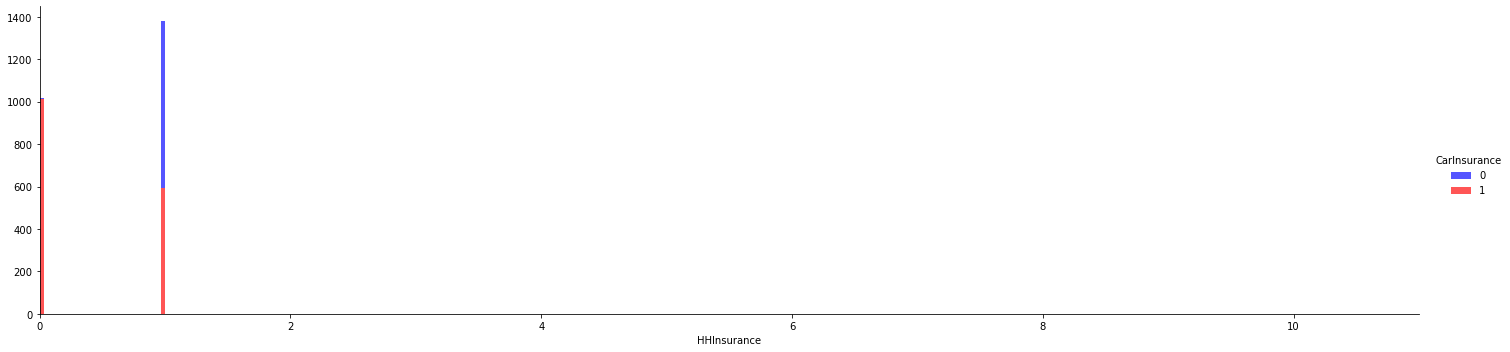

In [82]:
facet = sns.FacetGrid(Insurance_data, hue = "CarInsurance", size=5, aspect=4, palette='seismic')
facet.map(plt.hist, 'HHInsurance', bins=30)
facet.set(xlim=(0, Insurance_data.HHInsurance.max() + 10))
facet.add_legend()

C:\Users\My Lappie\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


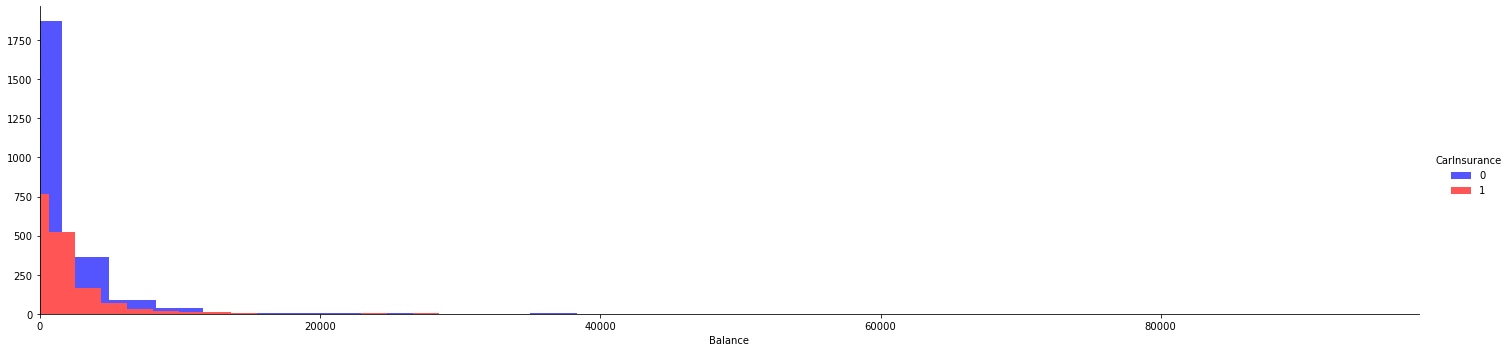

In [83]:
facet = sns.FacetGrid(Insurance_data, hue = "CarInsurance", size=5, aspect=4, palette='seismic')
facet.map(plt.hist, 'Balance', bins=30)
facet.set(xlim=(0, Insurance_data.Balance.max() + 10))
facet.add_legend()

observation\
people having low bank balance dont buy insurance\
the distrutbution in highly right skewed

In [84]:
categorical_cols = Insurance_data.select_dtypes(include = ['object']).columns

In [85]:
# get categorical variable
categorical_cols

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome', 'CallStart', 'CallEnd'],
      dtype='object')

In [86]:
# remove categrical variable callstart and callend from categorical_cols 
categorical_cols_plot = categorical_cols[(categorical_cols != 'CallStart') & (categorical_cols != 'CallEnd')]

In [87]:
categorical_cols_plot

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome'],
      dtype='object')

C:\Users\My Lappie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\My Lappie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\My Lappie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\M

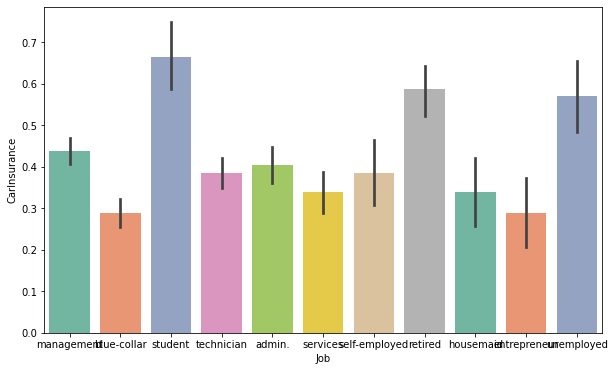

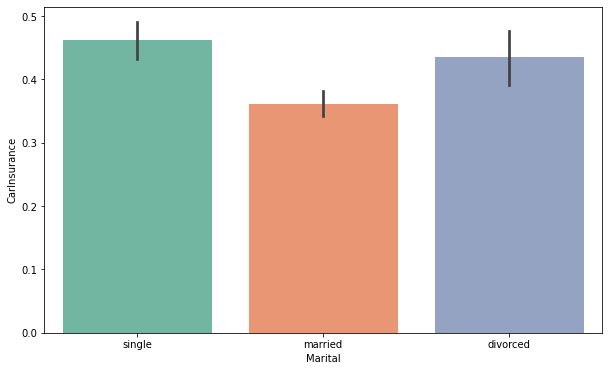

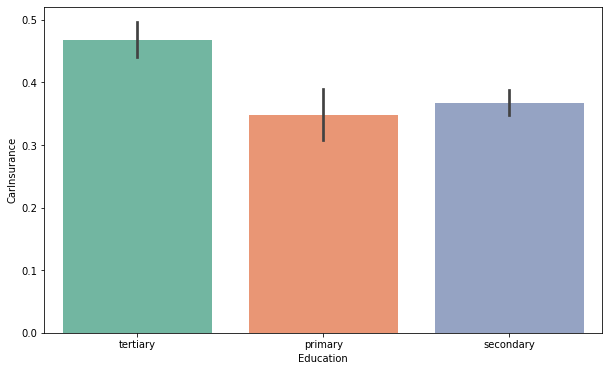

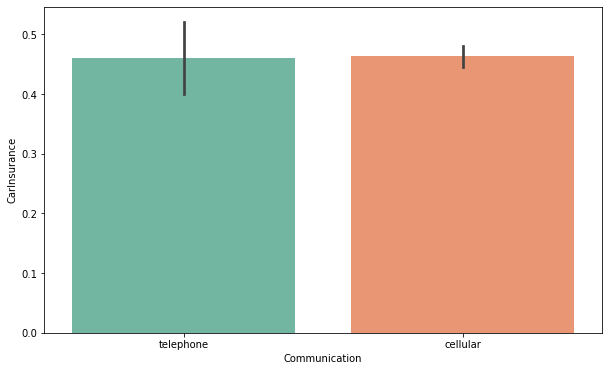

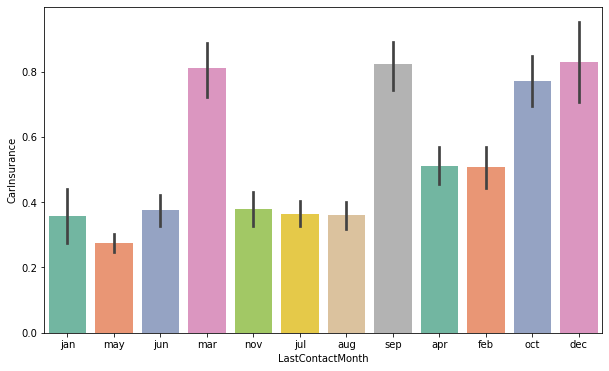

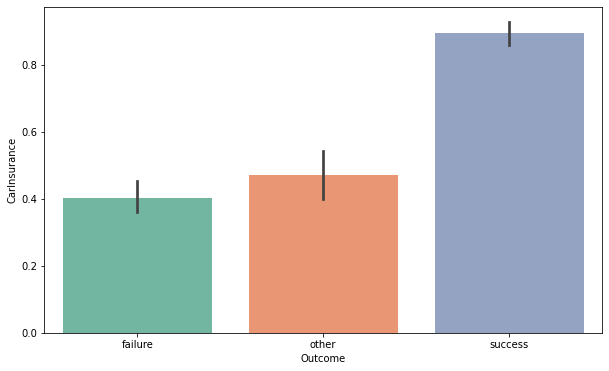

In [88]:
for feature in categorical_cols_plot:      # ploting barplot for all categorical variable
    plt.figure(figsize = (10,6))
    sns.barplot(feature, 'CarInsurance', data= Insurance_data, palette= 'Set2')
    
# the black line at the top of bars tells us about the variability of the values in the data
# how much the data vary with regards to car insurace 
# y-axis has the probability of buying car insurance

In [89]:
Insurance_data[Insurance_data.Balance > 80000]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
1742,1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,NaN,10:51:42,10:54:07,0


In [90]:
Insurance_data = Insurance_data.drop(Insurance_data[Insurance_data.index == 1742].index)

In [92]:
Insurance_data[Insurance_data.Balance > 80000]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance


In [100]:
Insurance_data.isna().sum().sort_values(ascending = False)

Outcome             3041
Communication        902
Education            169
Job                   19
CarLoan                0
Age                    0
Marital                0
Default                0
Balance                0
HHInsurance            0
CarInsurance           0
CallEnd                0
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
CallStart              0
Id                     0
dtype: int64

In [96]:
merge_data = pd.concat([Insurance_data, Insurance_test], keys=('train', 'test'))

In [97]:
merge_data

Id  Age          Job  Marital  Education  Default  Balance  \
train 0       1   32   management   single   tertiary        0     1218   
      1       2   32  blue-collar  married    primary        0     1156   
      2       3   29   management   single   tertiary        0      637   
      3       4   25      student   single    primary        0      373   
      4       5   30   management  married   tertiary        0     2694   
...         ...  ...          ...      ...        ...      ...      ...   
test  995  4996   31       admin.   single  secondary        0      131   
      996  4997   52   management  married   tertiary        0     2635   
      997  4998   46   technician  married   tertiary        0     3009   
      998  4999   60      retired  married  secondary        0     7038   
      999  5000   28   management   single   tertiary        0      957   

           HHInsurance  CarLoan Communication  LastContactDay  \
train 0              1        0     telephone              28   
      1              1        0           NaN              26   
      2              1        0      cellular               3   
      3              1        0      cellular              11   
      4              0        0      cellular               3   
...                ...      ...           ...             ...   
test  995            1        0      cellular              15   
      996            0        0      cellular               6   
      997            0        0      cellular               4   
      998            0        0     telephone               7   
      999            0        0      cellular              25   

          LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts  Outcome  \
train 0                jan             2          -1             0      NaN   
      1                may             5          -1             0      NaN   
      2                jun             1         119             1  failure   
      3                may             2          -1             0      NaN   
      4                jun             1          -1             0      NaN   
...                    ...           ...         ...           ...      ...   
test  995              jun             1          -1             0      NaN   
      996              sep             1         108             8  success   
      997              aug             2          -1             0      NaN   
      998              oct             4          -1             0      NaN   
      999              may             2          -1             0      NaN   

          CallStart   CallEnd  CarInsurance  
train 0    13:45:20  13:46:30           0.0  
      1    14:49:03  14:52:08           0.0  
      2    16:30:24  16:36:04           1.0  
      3    12:06:43  12:20:22           1.0  
      4    14:35:44  14:38:56           0.0  
...             ...       ...           ...  
test  995  13:54:24  13:56:55           NaN  
      996  13:13:38  13:18:51           NaN  
      997  10:23:35  10:24:33           NaN  
      998  17:01:49  17:04:07           NaN  
      999  12:15:19  12:30:34           NaN  

[4999 rows x 19 columns]

In [101]:
# remove id and CarInsrance variable
merge_data.drop(['CarInsurance', 'Id'], axis=1, inplace=True)

In [102]:
merge_data.shape

(4999, 17)

In [103]:
#total missing values  in data
total_missing = merge_data.isnull().sum()

In [104]:
merge_data.isnull().count()

Age                 4999
Job                 4999
Marital             4999
Education           4999
Default             4999
Balance             4999
HHInsurance         4999
CarLoan             4999
Communication       4999
LastContactDay      4999
LastContactMonth    4999
NoOfContacts        4999
DaysPassed          4999
PrevAttempts        4999
Outcome             4999
CallStart           4999
CallEnd             4999
dtype: int64

In [105]:
percentage = total_missing/merge_data.isnull().count()

In [235]:
percentage.sort_values(ascending=False)*100

Outcome             75.975195
Communication       22.464493
Education            4.320864
Job                  0.480096
CarLoan              0.000000
Marital              0.000000
Default              0.000000
Balance              0.000000
HHInsurance          0.000000
CallEnd              0.000000
CallStart            0.000000
LastContactDay       0.000000
LastContactMonth     0.000000
NoOfContacts         0.000000
DaysPassed           0.000000
PrevAttempts         0.000000
Age                  0.000000
dtype: float64

In [108]:
NAs = pd.concat([total_missing, percentage], axis=1, keys = ('Total', 'Percentage'))

In [114]:
NAs

,Total,Percentage
Age,0,0.000000
Job,24,0.004801
Marital,0,0.000000
Education,216,0.043209
Default,0,0.000000
Balance,0,0.000000
HHInsurance,0,0.000000
CarLoan,0,0.000000
Communication,1123,0.224645
LastContactDay,0,0.000000


In [115]:
NAs[NAs.Total>0].sort_values(by='Total', ascending = False)

,Total,Percentage
Outcome,3798,0.759752
Communication,1123,0.224645
Education,216,0.043209
Job,24,0.004801


In [ ]:
# replacing missing values

In [116]:
merge_data_df = merge_data.copy()  # creating a copy of the dataset

In [118]:
merge_data_df.groupby('Outcome')['Age'].nunique()

Outcome
failure    56
other      49
success    60
Name: Age, dtype: int64

In [119]:
merge_data_df.groupby('Outcome')['Age'].count()

Outcome
failure    548
other      248
success    405
Name: Age, dtype: int64

In [120]:
merge_data_df[merge_data_df.DaysPassed == -1]

Age          Job  Marital  Education  Default  Balance  \
train 0     32   management   single   tertiary        0     1218   
      1     32  blue-collar  married    primary        0     1156   
      3     25      student   single    primary        0      373   
      4     30   management  married   tertiary        0     2694   
      6     37       admin.   single   tertiary        0     1000   
...        ...          ...      ...        ...      ...      ...   
test  993   41     services  married  secondary        0      138   
      995   31       admin.   single  secondary        0      131   
      997   46   technician  married   tertiary        0     3009   
      998   60      retired  married  secondary        0     7038   
      999   28   management   single   tertiary        0      957   

           HHInsurance  CarLoan Communication  LastContactDay  \
train 0              1        0     telephone              28   
      1              1        0           NaN              26   
      3              1        0      cellular              11   
      4              0        0      cellular               3   
      6              1        0      cellular              17   
...                ...      ...           ...             ...   
test  993            1        0           NaN               1   
      995            1        0      cellular              15   
      997            0        0      cellular               4   
      998            0        0     telephone               7   
      999            0        0      cellular              25   

          LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts Outcome  \
train 0                jan             2          -1             0     NaN   
      1                may             5          -1             0     NaN   
      3                may             2          -1             0     NaN   
      4                jun             1          -1             0     NaN   
      6                mar             1          -1             0     NaN   
...                    ...           ...         ...           ...     ...   
test  993              jul             3          -1             0     NaN   
      995              jun             1          -1             0     NaN   
      997              aug             2          -1             0     NaN   
      998              oct             4          -1             0     NaN   
      999              may             2          -1             0     NaN   

          CallStart   CallEnd  
train 0    13:45:20  13:46:30  
      1    14:49:03  14:52:08  
      3    12:06:43  12:20:22  
      4    14:35:44  14:38:56  
      6    13:00:02  13:03:17  
...             ...       ...  
test  993  14:33:09  14:35:25  
      995  13:54:24  13:56:55  
      997  10:23:35  10:24:33  
      998  17:01:49  17:04:07  
      999  12:15:19  12:30:34  

[3798 rows x 17 columns]

In [121]:
merge_data_df.loc[merge_data_df['DaysPassed'] == -1, 'Outcome'] = 'NoPrev'   

# loc is matching the condition and replacing it with 'noprev' using index in the data
# or merge_data_df[merge_data_df['DaysPassed'] == -1].Outcome 

In [122]:
merge_data_df.Outcome.value_counts(1)

NoPrev     0.759752
failure    0.109622
success    0.081016
other      0.049610
Name: Outcome, dtype: float64

In [123]:
merge_data_df.Outcome.isnull().sum()

0

In [124]:
merge_data_df.Communication.value_counts()

cellular     3529
telephone     347
Name: Communication, dtype: int64

In [125]:
merge_data_df.Communication.fillna('None', inplace=True)

In [126]:
merge_data_df.Communication.value_counts()

cellular     3529
None         1123
telephone     347
Name: Communication, dtype: int64

In [127]:
merge_data_df.Education.value_counts()

secondary    2489
tertiary     1600
primary       694
Name: Education, dtype: int64

In [128]:
# create job-education level mapping list

edu_mode = []

In [129]:
# what are different job types

job_types = merge_data.Job.value_counts().index

In [130]:
job_types

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'unemployed', 'student', 'entrepreneur',
       'housemaid'],
      dtype='object')

In [131]:
# checking which job is most common

merge_data_df.Job.value_counts()

management       1113
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
Name: Job, dtype: int64

In [ ]:
#reference
#mode = merge_data_df[merge_data_df.Job == job]['Education'].value_counts().nlargest(1).index

In [133]:
for job in job_types:
    mode = merge_data_df[merge_data_df.Job == job]['Education'].value_counts().nlargest(1).index
    edu_mode = np.append(edu_mode, mode)

In [134]:
edu_mode

array(['tertiary', 'secondary', 'secondary', 'secondary', 'secondary',
       'secondary', 'tertiary', 'secondary', 'secondary', 'tertiary',
       'primary'], dtype=object)

In [135]:
edu_map = pd.Series(edu_mode, index = merge_data_df.Job.value_counts().index)
edu_map

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
unemployed       secondary
student          secondary
entrepreneur      tertiary
housemaid          primary
dtype: object

In [ ]:
# Reference
# merge_data_df.loc[merge_data_df['Job'] == 'management', 'Education']

In [ ]:
# reference
# edu_map.loc[edu_map.index=='management']

In [138]:
# applying the mapping to missing education variable
for j in job_types:
    merge_data_df.loc[(merge_data_df['Education'].isnull()) & 
                     (merge_data_df['Job']==j), 'Education'] = edu_map.loc[edu_map.index==j][0]

In [139]:
merge_data_df['Education'].fillna('None', inplace=True)

In [140]:
merge_data_df.Education.value_counts()

secondary    2639
tertiary     1649
primary       700
None           11
Name: Education, dtype: int64

In [141]:
# how many missing values in job 
merge_data_df.Job.isnull().sum()

24

In [142]:
# filling missing value of Jobs with none
merge_data_df['Job'].fillna('None', inplace=True)

In [143]:
merge_data_df.Job.isnull().sum()

0

In [144]:
merge_data_df.Job.value_counts()

management       1113
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
None               24
Name: Job, dtype: int64

In [145]:
merge_data_df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
dtype: int64

In [147]:
# lets separate  numerical and categrical data
numeric_dtypes = merge_data_df.select_dtypes(include=[np.number]).columns     # .columns makes it a list
categorical_dtypes = merge_data_df.select_dtypes(include=['object']).columns

In [148]:
numeric_dtypes

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts'],
      dtype='object')

In [149]:
categorical_dtypes

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome', 'CallStart', 'CallEnd'],
      dtype='object')

In [150]:
merge_data_df_num = merge_data_df[numeric_dtypes]      # converting numeric list data into dataframe
merge_data_df_cat = merge_data_df[categorical_dtypes]  # converting categorical list data into dataframe

In [151]:
merge_data_df_cat.columns

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome', 'CallStart', 'CallEnd'],
      dtype='object')

In [153]:
# Removing callstart and callend from our variable
merge_data_df_cat = merge_data_df_cat[['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth','Outcome']]

In [157]:
merge_data_df_cat.columns

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome'],
      dtype='object')

In [160]:
# creating dummy variable 
merge_data_df_cat_dummies = pd.get_dummies(merge_data_df_cat)
Insurance_data_dummy = pd.concat([merge_data_df_num, merge_data_df_cat_dummies], axis=1)

In [161]:
Insurance_data_dummy.head()

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0   32        0     1218            1        0              28   
      1   32        0     1156            1        0              26   
      2   29        0      637            1        0               3   
      3   25        0      373            1        0              11   
      4   30        0     2694            0        0               3   

         NoOfContacts  DaysPassed  PrevAttempts  Job_None  ...  \
train 0             2          -1             0         0  ...   
      1             5          -1             0         0  ...   
      2             1         119             1         0  ...   
      3             2          -1             0         0  ...   
      4             1          -1             0         0  ...   

         LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 0                     0                     0                     0   
      1                     0                     0                     1   
      2                     1                     0                     0   
      3                     0                     0                     1   
      4                     1                     0                     0   

         LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 0                     0                     0                     0   
      1                     0                     0                     0   
      2                     0                     0                     0   
      3                     0                     0                     0   
      4                     0                     0                     0   

         Outcome_NoPrev  Outcome_failure  Outcome_other  Outcome_success  
train 0               1                0              0                0  
      1               1                0              0                0  
      2               0                1              0                0  
      3               1                0              0                0  
      4               1                0              0                0  

[5 rows x 47 columns]

In [162]:
# splitting train test using index we created
idx = pd.IndexSlice
train_df = Insurance_data_dummy.loc[idx[['train',],:]]
test_df = Insurance_data_dummy.loc[idx[['test',],:]]

In [163]:
idx

In [164]:
# creating label
train_label = Insurance_data['CarInsurance']
print(train_df.shape)
print(test_df.shape)

(3999, 47)
(1000, 47)


#### **Splitting the train(train_df) data into train test**

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, train_label, train_size=0.7, random_state=100)

#### **Building Logictic Regression Model**

In [166]:
from sklearn.linear_model import LogisticRegression

In [167]:
lr = LogisticRegression()

In [168]:
lr2 = LogisticRegression(max_iter=1000)

In [169]:
# fit the model 
lr.fit(X_train, y_train)

C:\Users\My Lappie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [170]:
lr2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [171]:
y_pred = lr.predict(X_test)   # making predictions

In [174]:
y_pred2 = lr2.predict(X_test)

In [176]:
# getting from model performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

In [177]:
confusion_matrix(y_test, y_pred)

array([[614, 113],
       [277, 196]], dtype=int64)

In [178]:
confusion_matrix(y_test, y_pred2)

array([[624, 103],
       [236, 237]], dtype=int64)

In [179]:
from sklearn.metrics import f1_score

In [180]:
f1_score(y_test, y_pred)

0.5012787723785166

In [181]:
f1_score(y_test, y_pred2)

0.5830258302583027

In [227]:
accuracy_score(y_test, y_pred)

0.675

In [183]:
accuracy_score(y_test, y_pred2)

0.7175

In [184]:
precision_score(y_test, y_pred)

0.6343042071197411

In [185]:
precision_score(y_test, y_pred2)

0.6970588235294117

In [186]:
recall_score(y_test, y_pred)

0.4143763213530655

In [187]:
recall_score(y_test, y_pred2)

0.5010570824524313

In [188]:
roc_auc_score(y_test, y_pred)

0.6294715169351297

In [189]:
roc_auc_score(y_test, y_pred2)

0.6796894765769721

In [222]:
y_arr = np.asarray(y_train)

In [228]:
x_arr = np.asarray(X_train)

In [229]:
logit_mod2 = sm.Logit(y_arr, x_arr)

In [230]:
result2 = logit_mod2.fit()

Optimization terminated successfully.
         Current function value: 0.562245
         Iterations 6


In [231]:
result2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:                Logit            Pseudo R-squared: 0.167      
Dependent Variable:   y                AIC:              3231.4469  
Date:                 2021-08-31 12:20 BIC:              3480.8017  
No. Observations:     2799             Log-Likelihood:   -1573.7    
Df Model:             41               LL-Null:          -1888.3    
Df Residuals:         2757             LLR p-value:      2.4411e-106
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       6.0000                                        
--------------------------------------------------------------------
     Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
--------------------------------------------------------------------
x1   0.0046       0.0052  0.8935 0.3716        -0.0055        0.0147
x2  -0.2270       0.3855 -0.5888 0.5560        -0.9826        0.5286
x3   0.0000       0.0000  0.2359 0.8135        -0.0000        0.0000
x4  -0.5830       0.1016 -5.7409 0.0000        -0.7820       -0.3840
x5  -0.2016       0.1383 -1.4574 0.1450        -0.4727        0.0695
x6  -0.0015       0.0060 -0.2431 0.8080        -0.0132        0.0103
x7  -0.0631       0.0187 -3.3777 0.0007        -0.0997       -0.0265
x8   0.0006       0.0008  0.8102 0.4178        -0.0009        0.0022
x9   0.0698       0.0327  2.1350 0.0328         0.0057        0.1339
x10  0.0654          nan     nan    nan            nan           nan
x11 -0.0184          nan     nan    nan            nan           nan
x12 -0.0641          nan     nan    nan            nan           nan
x13 -0.4756          nan     nan    nan            nan           nan
x14 -0.4004          nan     nan    nan            nan           nan
x15 -0.2023          nan     nan    nan            nan           nan
x16  0.1676          nan     nan    nan            nan           nan
x17 -0.4995          nan     nan    nan            nan           nan
x18 -0.0967          nan     nan    nan            nan           nan
x19  0.4168          nan     nan    nan            nan           nan
x20 -0.1221          nan     nan    nan            nan           nan
x21  0.3177          nan     nan    nan            nan           nan
x22  0.7806 5440429.1164  0.0000 1.0000 -10663044.3479 10663045.9091
x23  0.3192 5210358.0759  0.0000 1.0000 -10212113.8562 10212114.4946
x24  0.6602 5388081.3825  0.0000 1.0000 -10560444.7953 10560446.1156
x25 -0.3749          nan     nan    nan            nan           nan
x26 -0.4684          nan     nan    nan            nan           nan
x27 -0.5677          nan     nan    nan            nan           nan
x28 -0.1679          nan     nan    nan            nan           nan
x29 -0.6975  893365.8437 -0.0000 1.0000  -1750965.5762  1750964.1813
x30  0.4817          nan     nan    nan            nan           nan
x31  0.3897          nan     nan    nan            nan           nan
x32 -0.0031          nan     nan    nan            nan           nan
x33 -0.7322          nan     nan    nan            nan           nan
x34  0.7718          nan     nan    nan            nan           nan
x35 -0.3070          nan     nan    nan            nan           nan
x36 -1.0749          nan     nan    nan            nan           nan
x37 -0.4410          nan     nan    nan            nan           nan
x38  0.1597          nan     nan    nan            nan           nan
x39  1.1095          nan     nan    nan            nan           nan
x40 -0.2897          nan     nan    nan            nan           nan
x41 -0.6775          nan     nan    nan            nan           nan
x42  0.9774          nan     nan    nan            nan           nan
x43  0.6809          nan     nan    nan            nan           nan
x44 -0.1578          nan     nan    nan            nan           nan
x45 -0.5875          nan     nan    nan      

In [232]:
logit_mod3 = sm.Logit(y_train.values.tolist(), X_train.values.tolist())

In [233]:
result3 = logit_mod3.fit()

Optimization terminated successfully.
         Current function value: 0.562245
         Iterations 8


In [234]:
result3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.167      
Dependent Variable: y                AIC:              3231.4469  
Date:               2021-08-31 12:24 BIC:              3480.8017  
No. Observations:   2799             Log-Likelihood:   -1573.7    
Df Model:           41               LL-Null:          -1888.3    
Df Residuals:       2757             LLR p-value:      2.4411e-106
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
------------------------------------------------------------------
     Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
------------------------------------------------------------------
x1   0.0046       0.0052  0.8935 0.3716       -0.0055       0.0147
x2  -0.2270       0.3855 -0.5888 0.5560       -0.9826       0.5286
x3   0.0000       0.0000  0.2359 0.8135       -0.0000       0.0000
x4  -0.5830       0.1016 -5.7409 0.0000       -0.7820      -0.3840
x5  -0.2016       0.1383 -1.4574 0.1450       -0.4727       0.0695
x6  -0.0015       0.0060 -0.2431 0.8080       -0.0132       0.0103
x7  -0.0631       0.0187 -3.3777 0.0007       -0.0997      -0.0265
x8   0.0006       0.0008  0.8102 0.4178       -0.0009       0.0022
x9   0.0698       0.0327  2.1350 0.0328        0.0057       0.1339
x10  0.1850          nan     nan    nan           nan          nan
x11  0.1012          nan     nan    nan           nan          nan
x12  0.0555          nan     nan    nan           nan          nan
x13 -0.3560          nan     nan    nan           nan          nan
x14 -0.2808          nan     nan    nan           nan          nan
x15 -0.0827          nan     nan    nan           nan          nan
x16  0.2871          nan     nan    nan           nan          nan
x17 -0.3799          nan     nan    nan           nan          nan
x18  0.0228          nan     nan    nan           nan          nan
x19  0.5363          nan     nan    nan           nan          nan
x20 -0.0026          nan     nan    nan           nan          nan
x21  0.4373          nan     nan    nan           nan          nan
x22  0.1088 3631532.5184  0.0000 1.0000 -7117672.8360 7117673.0536
x23 -0.3526 4220615.8179 -0.0000 1.0000 -8272255.3482 8272254.6430
x24 -0.0116 3233662.7837 -0.0000 1.0000 -6337862.6057 6337862.5825
x25  0.1773          nan     nan    nan           nan          nan
x26  0.0838          nan     nan    nan           nan          nan
x27 -0.0155          nan     nan    nan           nan          nan
x28  0.3843          nan     nan    nan           nan          nan
x29 -0.6975          nan     nan    nan           nan          nan
x30  0.4817          nan     nan    nan           nan          nan
x31  0.3897          nan     nan    nan           nan          nan
x32 -0.0031          nan     nan    nan           nan          nan
x33 -0.7322          nan     nan    nan           nan          nan
x34  0.7718          nan     nan    nan           nan          nan
x35 -0.3070          nan     nan    nan           nan          nan
x36 -1.0749          nan     nan    nan           nan          nan
x37 -0.4410          nan     nan    nan           nan          nan
x38  0.1597          nan     nan    nan           nan          nan
x39  1.1095          nan     nan    nan           nan          nan
x40 -0.2897          nan     nan    nan           nan          nan
x41 -0.6775          nan     nan    nan           nan          nan
x42  0.9774          nan     nan    nan           nan          nan
x43  0.6809          nan     nan    nan           nan          nan
x44 -0.1578          nan     nan    nan           nan          nan
x45 -0.5875          nan     nan    nan           nan          nan
x46 -0.6749          nan     nan    nan           nan          nan
x47  1.5941          nan